In [26]:
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder, OrdinalEncoder
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.metrics import accuracy_score,confusion_matrix,precision_score

In [2]:
# Load dataset
df = pd.read_csv("heart.csv") 

In [3]:
df.sample(5)

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
65,59,1,3,170,288,0,0,159,0,0.2,1,0,3,0
859,51,1,0,140,299,0,1,173,1,1.6,2,0,3,0
839,51,1,0,140,261,0,0,186,1,0.0,2,0,2,1
815,58,1,2,105,240,0,0,154,1,0.6,1,0,3,1
766,57,1,0,110,335,0,1,143,1,3.0,1,1,3,0


In [4]:
df.shape

(1025, 14)

In [5]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,1025.000000,1025.000000,1025.000000,1025.000000,1025.00000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000,1025.000000
mean,54.434146,0.695610,0.942439,131.611707,246.00000,0.149268,0.529756,149.114146,0.336585,1.071512,1.385366,0.754146,2.323902,0.513171
std,9.072290,0.460373,1.029641,17.516718,51.59251,0.356527,0.527878,23.005724,0.472772,1.175053,0.617755,1.030798,0.620660,0.500070
min,29.000000,0.000000,0.000000,94.000000,126.00000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,0.000000,120.000000,211.00000,0.000000,0.000000,132.000000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,56.000000,1.000000,1.000000,130.000000,240.00000,0.000000,1.000000,152.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,275.00000,0.000000,1.000000,166.000000,1.000000,1.800000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.00000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB


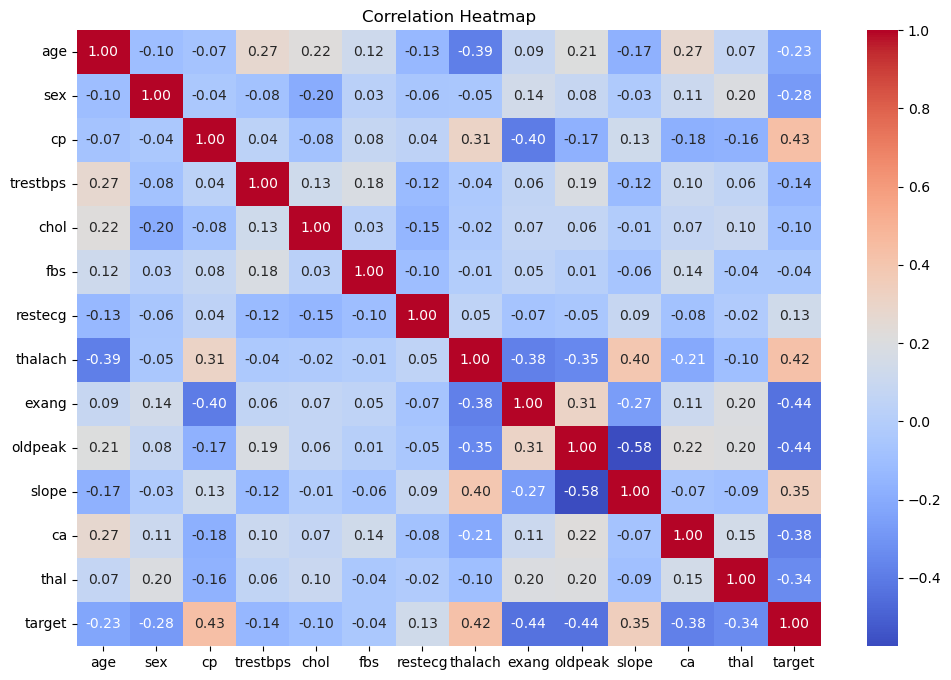

In [7]:
plt.figure(figsize=(12, 8))
sns.heatmap(df.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("Correlation Heatmap")
plt.show()

In [8]:
df.corr()["target"]

age        -0.229324
sex        -0.279501
cp          0.434854
trestbps   -0.138772
chol       -0.099966
fbs        -0.041164
restecg     0.134468
thalach     0.422895
exang      -0.438029
oldpeak    -0.438441
slope       0.345512
ca         -0.382085
thal       -0.337838
target      1.000000
Name: target, dtype: float64

In [9]:
from ydata_profiling import ProfileReport

profile = ProfileReport(df, explorative=True)
profile.to_file("EDA_Heart2.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]


100%|██████████████████████████████████████████████████████████████████████████████████| 14/14 [00:00<00:00, 23.17it/s]


Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

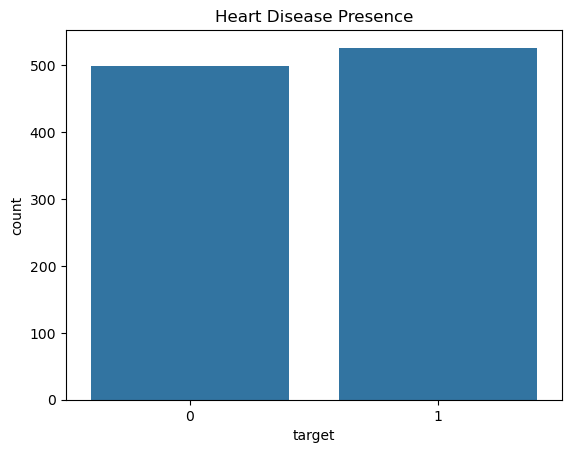

In [10]:
# Countplot of target
sns.countplot(x='target', data=df)
plt.title("Heart Disease Presence")
plt.show()

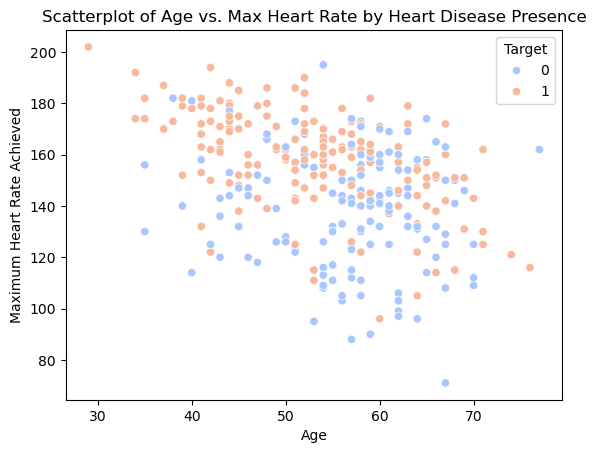

In [11]:
# Scatterplot of two selected features with target classes
sns.scatterplot(data=df, x='age', y='thalach', hue='target', palette='coolwarm')
plt.title("Scatterplot of Age vs. Max Heart Rate by Heart Disease Presence")
plt.xlabel("Age")
plt.ylabel("Maximum Heart Rate Achieved")
plt.legend(title='Target')
plt.show()

In [12]:
X = df.drop('target', axis=1)
y = df['target']

In [13]:
sc=StandardScaler()
X_processed = sc.fit_transform(X)

In [14]:
# Split into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_processed, y, test_size=0.1, random_state=5)

In [15]:
# Use Logistic Regression
model = LogisticRegression()
model.fit(X_train, y_train)

LogisticRegression()

In [16]:
# Predictions
y_pred = model.predict(X_test)

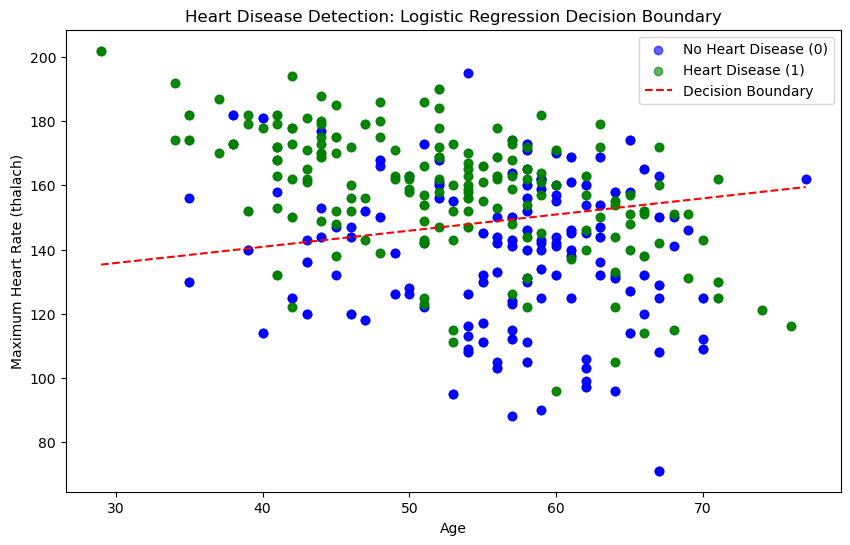

In [17]:
# Scatter plot of predicted vs actual with decision boundary

# Use two important features
feature1 = 'age'
feature2 = 'thalach'

# Scatter plot with colors for target 0 and 1
plt.figure(figsize=(10, 6))
plt.scatter(df[df['target'] == 0][feature1], df[df['target'] == 0][feature2], color='blue', alpha=0.6, label='No Heart Disease (0)')
plt.scatter(df[df['target'] == 1][feature1], df[df['target'] == 1][feature2], color='green', alpha=0.6, label='Heart Disease (1)')

# Train a simple logistic regression on these two features
X_vis = df[[feature1, feature2]]
y_vis = df['target']
model_vis = LogisticRegression()
model_vis.fit(X_vis, y_vis)

# Create line for decision boundary
x_values = np.linspace(X_vis[feature1].min(), X_vis[feature1].max(), 200)
y_values = -(model_vis.coef_[0][0] * x_values + model_vis.intercept_[0]) / model_vis.coef_[0][1]

plt.plot(x_values, y_values, color='red', linestyle='--', label='Decision Boundary')

# Plot settings
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.title('Heart Disease Detection: Logistic Regression Decision Boundary')
plt.legend()
plt.show()


In [18]:
# 5. Metrics
print("\n--- Classification Report ---")
print(classification_report(y_test, y_pred))


--- Classification Report ---
              precision    recall  f1-score   support

           0       0.98      0.84      0.90        49
           1       0.87      0.98      0.92        54

    accuracy                           0.91       103
   macro avg       0.92      0.91      0.91       103
weighted avg       0.92      0.91      0.91       103




--- Confusion Matrix ---


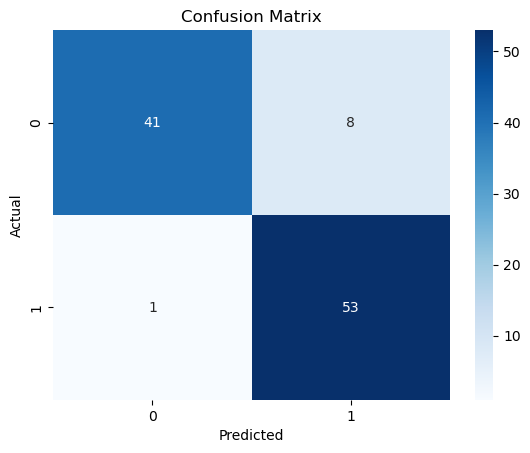

In [19]:
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

In [20]:
print("\n--- Accuracy Score ---")
print(f"Accuracy: {accuracy_score(y_test, y_pred) * 100:.2f}%")


--- Accuracy Score ---
Accuracy: 91.26%


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB,BernoulliNB

In [22]:
svc = SVC(kernel='sigmoid', gamma=1.0)
knc = KNeighborsClassifier()
bnb = BernoulliNB()
dtc = DecisionTreeClassifier(max_depth=5)
lrc = LogisticRegression(solver='liblinear', penalty='l1')
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
etc = ExtraTreesClassifier(n_estimators=50, random_state=2)
gbdt = GradientBoostingClassifier(n_estimators=50,random_state=2)
gnb = GaussianNB()

In [23]:
clfs = {
    'SVC' : svc,
    'KN' : knc, 
    'NB': bnb, 
    'DT': dtc, 
    'LR': lrc, 
    'RF': rfc, 
    'AdaBoost': abc, 
    'BgC': bc, 
    'gnb': gnb, 
    'GBDT':gbdt}

In [24]:
#Create a Method that takes a classifier Algo and Training,Testing data and then give the Accuracy and Precision of That Algo
def train_classifier(clf,X_train,y_train,X_test,y_test):
    clf.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision = precision_score(y_test,y_pred)
    
    return {'accuracy': accuracy, 'precision': precision}

In [27]:
#Testing(Example of) the Above Method
results = train_classifier(rfc, X_train, y_train, X_test, y_test)
print("Accuracy:", results['accuracy'])
print("Precision:", results['precision'])

Accuracy: 1.0
Precision: 1.0


In [28]:
#Yaha Pa Hum ny AK loop lagaya jo clfs pa chla ra ha aur wo har dafa ak algo la ka us pa model train kar ra ha
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    
       result = train_classifier(clf, X_train, y_train, X_test, y_test)
       print("For", name)
       print("Accuracy -", result['accuracy'])
       print("Precision -", result['precision'])

       accuracy_scores.append(result['accuracy'])
       precision_scores.append(result['precision'])

For SVC
Accuracy - 0.6699029126213593
Precision - 0.7631578947368421
For KN
Accuracy - 0.9223300970873787
Precision - 0.9259259259259259
For NB
Accuracy - 0.8737864077669902
Precision - 0.8596491228070176
For DT
Accuracy - 0.9320388349514563
Precision - 0.9272727272727272
For LR
Accuracy - 0.9029126213592233
Precision - 0.8548387096774194
For RF
Accuracy - 1.0
Precision - 1.0


E:\Newfolder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


For AdaBoost
Accuracy - 0.9514563106796117
Precision - 0.9454545454545454
For BgC
Accuracy - 1.0
Precision - 1.0
For gnb
Accuracy - 0.8252427184466019
Precision - 0.8214285714285714
For GBDT
Accuracy - 0.9514563106796117
Precision - 0.9298245614035088


In [29]:
performance_df = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)

In [30]:
performance_df

,Algorithm,Accuracy,Precision
5,RF,1.000000,1.000000
7,BgC,1.000000,1.000000
6,AdaBoost,0.951456,0.945455
9,GBDT,0.951456,0.929825
3,DT,0.932039,0.927273
1,KN,0.922330,0.925926
2,NB,0.873786,0.859649
4,LR,0.902913,0.854839
8,gnb,0.825243,0.821429
0,SVC,0.669903,0.763158


In [31]:
performance_df1 = pd.melt(performance_df, id_vars = "Algorithm")
performance_df1

,Algorithm,variable,value
0,RF,Accuracy,1.000000
1,BgC,Accuracy,1.000000
2,AdaBoost,Accuracy,0.951456
3,GBDT,Accuracy,0.951456
4,DT,Accuracy,0.932039
5,KN,Accuracy,0.922330
6,NB,Accuracy,0.873786
7,LR,Accuracy,0.902913
8,gnb,Accuracy,0.825243
9,SVC,Accuracy,0.669903


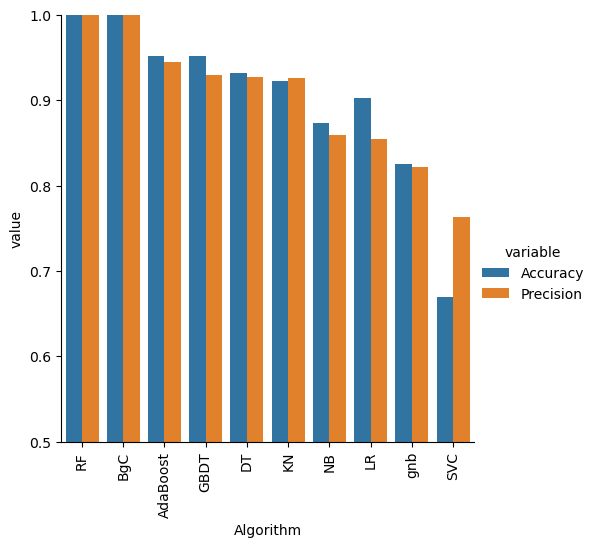

In [32]:
sns.catplot(x = 'Algorithm', y='value', 
               hue = 'variable',data=performance_df1, kind='bar',height=5)
plt.ylim(0.5,1.0)
plt.xticks(rotation='vertical')
plt.show()

In [33]:
# Voting Classifier of our best Performing Models
rfc = RandomForestClassifier(n_estimators=50, random_state=2)
bc = BaggingClassifier(n_estimators=50, random_state=2)
abc = AdaBoostClassifier(n_estimators=50, random_state=2)
from sklearn.ensemble import VotingClassifier
voting = VotingClassifier(estimators=[('RF', rfc), ('BgC', bc), ('AdaBoost', abc)],voting='soft')

In [34]:
voting.fit(X_train,y_train)

E:\Newfolder\Lib\site-packages\sklearn\ensemble\_weight_boosting.py:519: FutureWarning: The SAMME.R algorithm (the default) is deprecated and will be removed in 1.6. Use the SAMME algorithm to circumvent this warning.
  warnings.warn(


VotingClassifier(estimators=[('RF',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=2)),
                             ('BgC',
                              BaggingClassifier(n_estimators=50,
                                                random_state=2)),
                             ('AdaBoost', AdaBoostClassifier(random_state=2))],
                 voting='soft')

In [35]:
y_pred = voting.predict(X_test)
print("Accuracy of Voting Classifier",accuracy_score(y_test,y_pred))
print("Precision of Voting Classifier",precision_score(y_test,y_pred))

Accuracy of Voting Classifier 1.0
Precision of Voting Classifier 1.0



--- Confusion Matrix ---


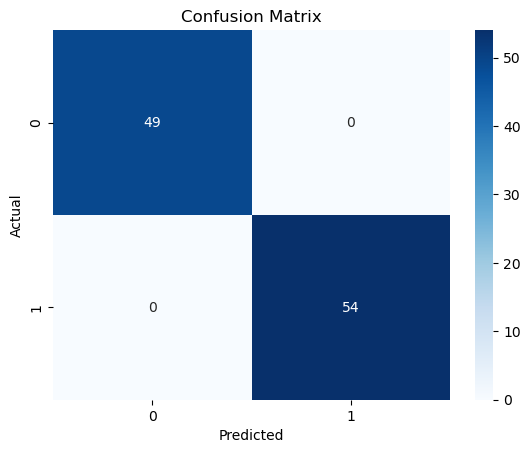

In [36]:
print("\n--- Confusion Matrix ---")
conf_matrix = confusion_matrix(y_test, y_pred)
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()